# Nature Conservancy Fisheries Kaggle Competition
## Training Backstage
This script can be used in the background to FISH_FINDER_TRAINING to observe staged fovea and commit them to the training set manually.  
#### Dependencies

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from scipy import misc
import os
import fish_data as fd
import matplotlib.pyplot as plt
% matplotlib inline

#### Load Metadata for run

In [13]:
version_ID = 'PILOT_RUN_v5'

In [14]:
wd = os.getcwd()
md = wd+'/FISHFINDER_MODELS/'+version_ID
if not os.path.exists(md) :
    os.makedirs(md)
tensorboard_path = md+'/Tensorboard_logs'


In [15]:
with open(md+'/meta_dictionary.pickle', 'rb') as  handle :
    meta_dict = pickle.load(handle)
#print(meta_dict)

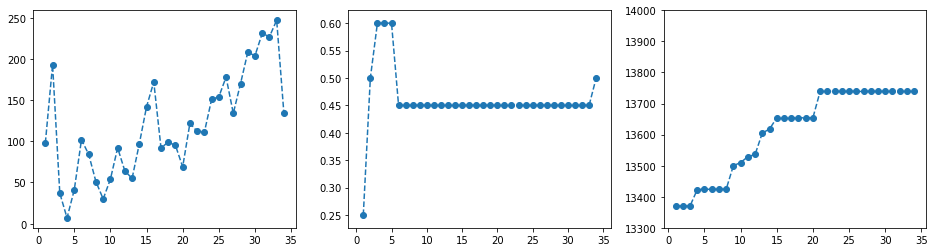

In [16]:
epoch_completed, staged, training, keep_threshold  = [], [], [], []
for x in meta_dict :
    if x != 0 :
        epoch_completed.append(x)
        staged.append(meta_dict.get(x).get('stage_set'))
        keep_threshold.append(meta_dict.get(x).get('keep_threshold'))
        training.append(meta_dict.get(x).get('training_set'))

f, axarr = plt.subplots(1,3, figsize=(16,4))
axarr[0].scatter(epoch_completed, staged)
axarr[0].plot(epoch_completed, staged, linestyle = '--')
axarr[1].plot(epoch_completed, keep_threshold, linestyle = '--')
axarr[1].scatter(epoch_completed, keep_threshold)
axarr[2].scatter(epoch_completed, training)
axarr[2].plot(epoch_completed, training, linestyle = '--')
axarr[2].set_ylim(13300, 14000)
plt.show()

#### Load fovea dictionaries

In [17]:
with open(md+'/staged_dictionary.pickle', 'rb') as handle :
    staged_dictionary = pickle.load(handle)
print(len(staged_dictionary))

134


In [18]:
with open(md+'/training_dictionary.pickle', 'rb') as handle : 
    training_set_dictionary = pickle.load(handle)
print(len(training_set_dictionary))


13860


#### Analyze fovea

Image Label: ALB     Fovea prediction: NoF


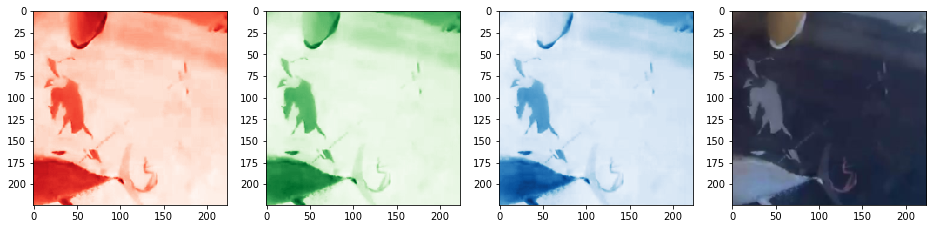

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: f
Image Label: LAG     Fovea prediction: NoF


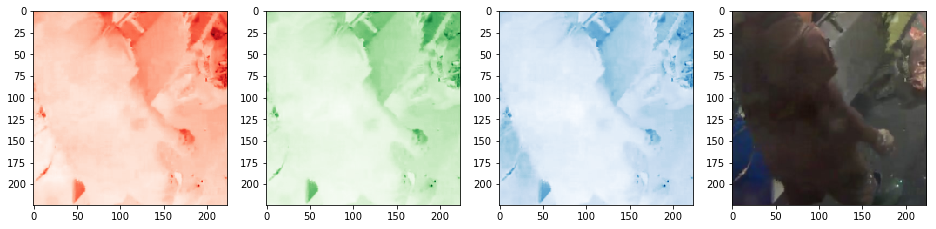

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: NoF     Fovea prediction: NoF


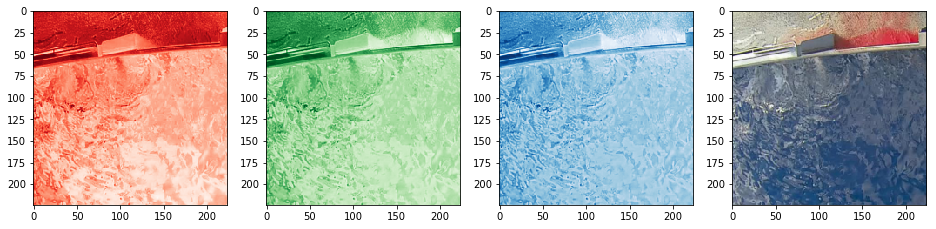

Auto commit triggered!
Image Label: NoF     Fovea prediction: NoF


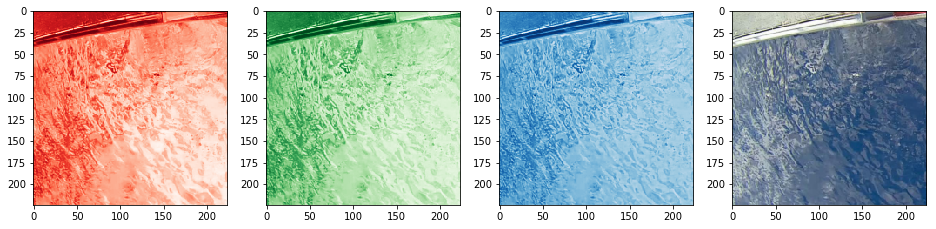

Auto commit triggered!
Image Label: NoF     Fovea prediction: NoF


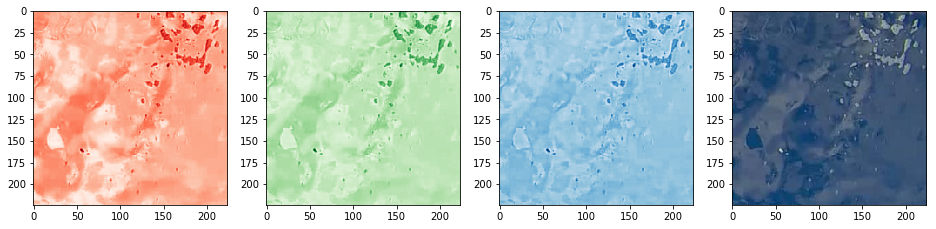

Auto commit triggered!
Image Label: NoF     Fovea prediction: NoF


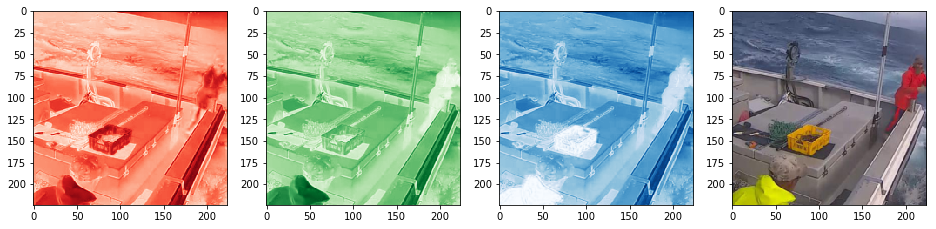

Auto commit triggered!
Image Label: ALB     Fovea prediction: NoF


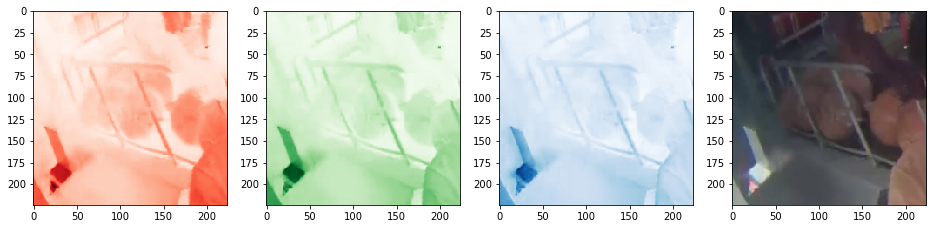

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: BET     Fovea prediction: NoF


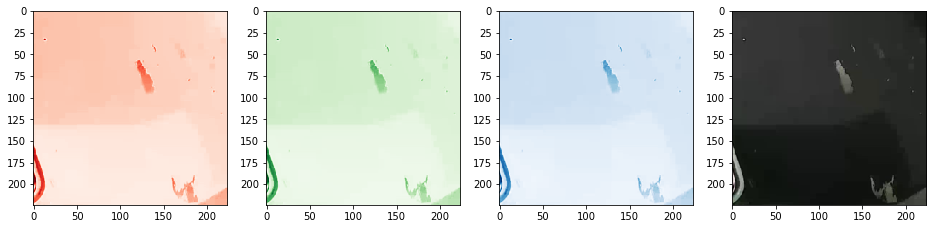

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: OTHER     Fovea prediction: NoF


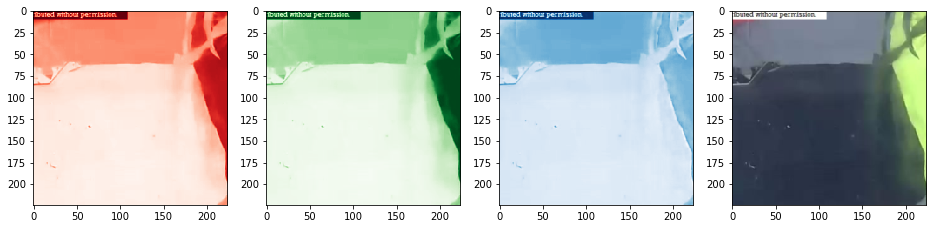

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: ALB     Fovea prediction: NoF


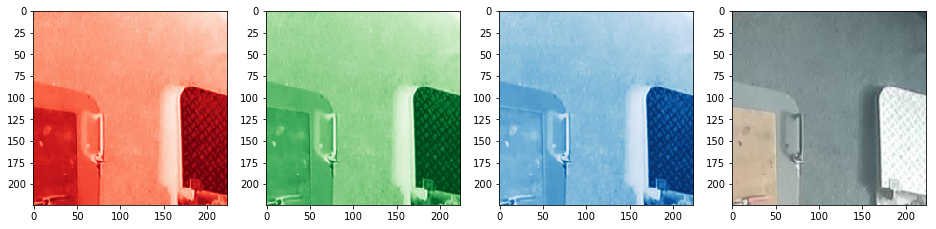

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: BET     Fovea prediction: NoF


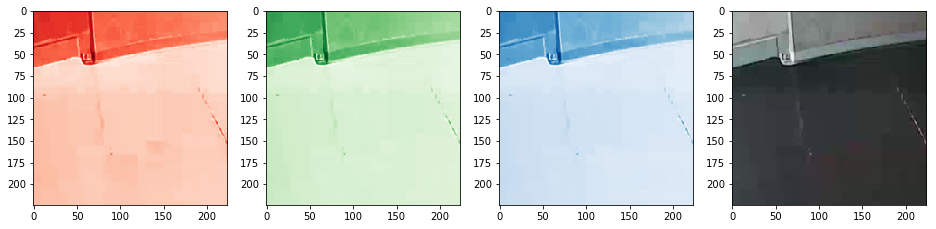

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: ALB     Fovea prediction: NoF


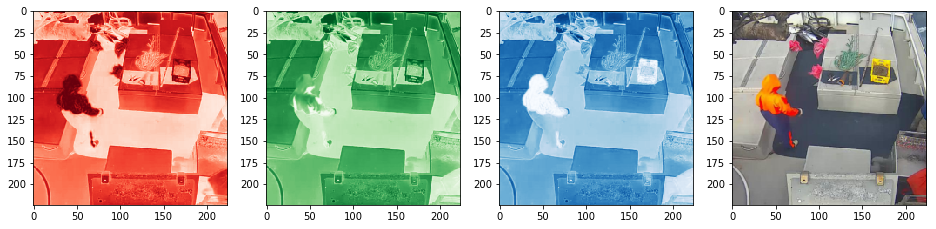

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: YFT     Fovea prediction: NoF


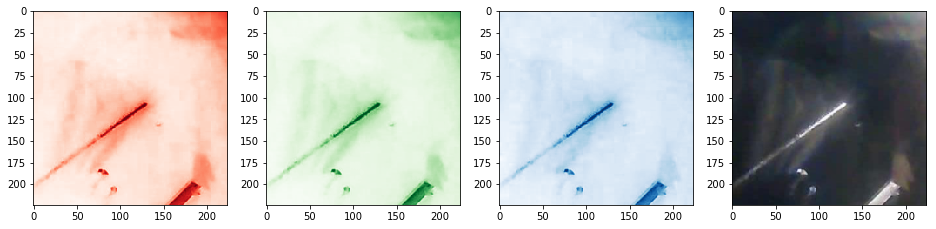

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: TEST     Fovea prediction: NoF


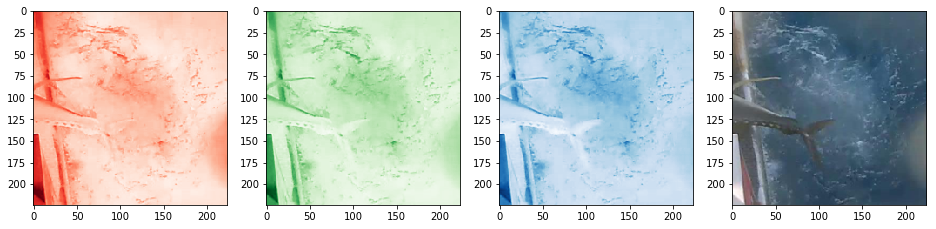

Correct, commit : c; Incorrect, destage: d       Answer: d
Image Label: NoF     Fovea prediction: NoF


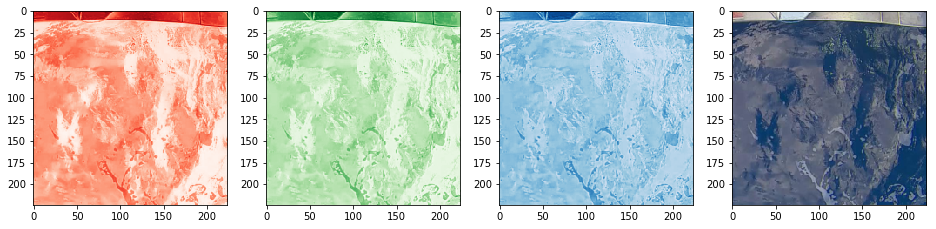

Auto commit triggered!
Image Label: ALB     Fovea prediction: NoF


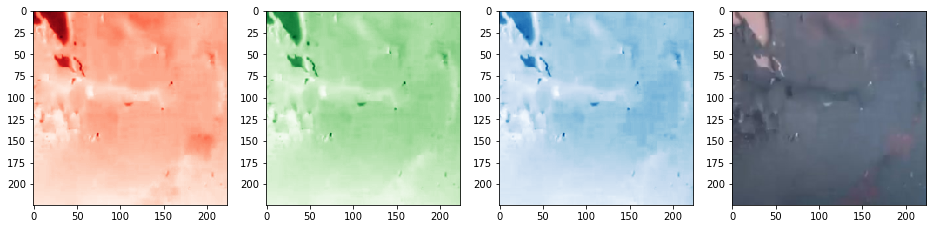

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: ALB     Fovea prediction: NoF


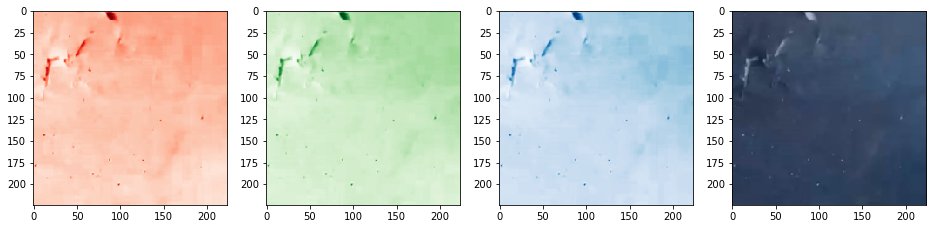

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: NoF     Fovea prediction: NoF


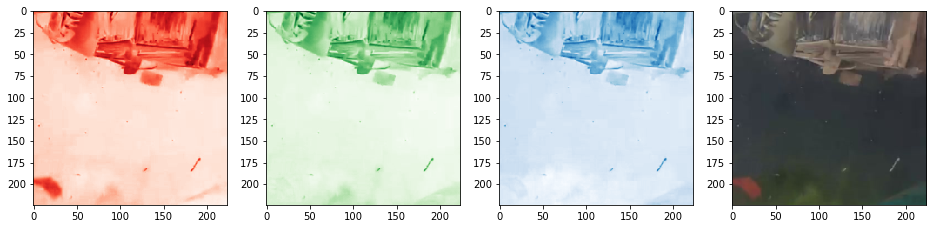

Auto commit triggered!
Image Label: OTHER     Fovea prediction: NoF


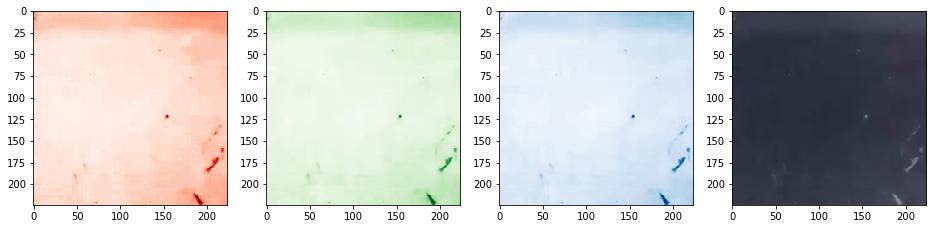

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c
Image Label: NoF     Fovea prediction: NoF


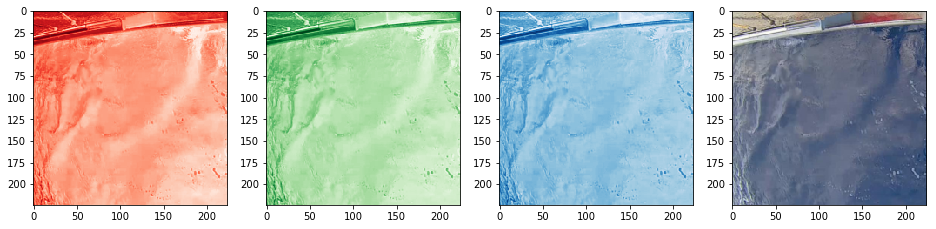

Auto commit triggered!
Image Label: ALB     Fovea prediction: NoF


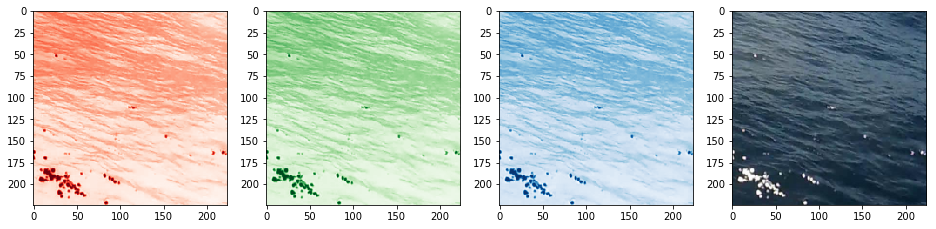

Correct, commit : c; Incorrect, commit as fish: f, Incorrect, destage: d       Answer: c


New size of training_set_dictionary: 13880
New size of staged_set_dictionary: 113


In [19]:
fd.manual_stage_manager(staged_dictionary, training_set_dictionary, 224, stage_step_threshold = 5, md = md)

In [20]:
with open(md+'/staged_dictionary.pickle', 'wb') as fsd:
    pickle.dump(staged_dictionary, fsd)
with open(md+'/training_dictionary.pickle', 'wb') as ftd:
    pickle.dump(training_set_dictionary, ftd)